# **Klasifikasi Penyakit Jantung**

# 1. Latar Belakang

Penyakit jantung terus menjadi salah satu tantangan utama dalam bidang kesehatan global, menyebabkan jutaan kematian setiap tahun. Keterbatasan dalam metode diagnosa konvensional seperti pemeriksaan fisik dan tes laboratorium sering kali memakan waktu dan biaya yang tinggi, serta bergantung pada keahlian tenaga medis. Perkembangan teknologi kecerdasan buatan (AI) dan machine learning telah membuka peluang baru dalam analisis data medis yang lebih cepat dan efisien. Dengan memanfaatkan data pasien seperti tekanan darah, kadar kolesterol, usia, dan faktor risiko lainnya, teknologi ini mampu memberikan solusi yang lebih terjangkau dan andal untuk mendeteksi risiko penyakit jantung.

# 2. Tujuan

Mengembangkan dan mengimplementasikan model machine learning berbasis data medis yang bertujuan untuk:
1. Meningkatkan akurasi prediksi risiko penyakit jantung.
2. Mempercepat proses diagnosa tanpa mengurangi ketelitian.
3. Mendukung langkah-langkah preventif yang lebih proaktif dalam mengurangi angka kejadian penyakit jantung.
4. Memberikan solusi teknologi yang dapat digunakan sebagai alat bantu dalam pengambilan keputusan klinis oleh tenaga medis.


# Import Library

In [1]:
import pandas as pd  # Mengimpor library pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk membuat visualisasi data
import seaborn as sns  # Mengimpor Seaborn untuk visualisasi data yang lebih estetis
import numpy as np  # Mengimpor NumPy untuk operasi numerik seperti manipulasi array

# Mengatur tampilan grafik dengan latar belakang putih dan grid
sns.set(style="whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset  dibaca menggunakan fungsi pd.read_csv() dari pandas. Lokasi file disesuaikan dengan path yang ada di komputer. Dataset ini berisi data pasien untuk menganalisis risiko penyakit jantung.

In [18]:
# Memuat dataset dari path lengkap
data = pd.read_csv(r"/content/drive/MyDrive/Dataset Jantung/heart.csv")

# Menampilkan 5 baris pertama data untuk memahami strukturnya
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
# Menampilkan dataset setelah penghapusan kolom
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [20]:
# Statistik deskriptif
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [21]:
# Melihat jumlah baris dan kolom
jumlah_baris = len(data)
jumlah_kolom = data.shape[1]

print(f"Jumlah baris dalam dataset: {jumlah_baris}")
print(f"Jumlah kolom dalam dataset: {jumlah_kolom}")

Jumlah baris dalam dataset: 918
Jumlah kolom dalam dataset: 12


# Informasi Dataset

Dataset ini terdiri dari 920 baris dan 15 kolom, yang mencakup data pasien dengan berbagai variabel, baik numerik maupun kategorikal. Variabel-variabel ini memberikan informasi tentang faktor risiko penyakit jantung dan karakteristik pasien.

## 1. Kolom Target (HeartDisease)

Kolom target adalah variabel dependen yang akan diprediksi oleh model. Nilai dari kolom target adalah:
- **0**: Risiko rendah penyakit jantung (Normal).
- **1**: Risiko tinggi penyakit jantung (Heart Disease).

## 2. Distribusi Variabel Target

Distribusi variabel target relatif seimbang, sehingga cocok untuk digunakan dalam model klasifikasi. Ini memastikan bahwa model tidak bias terhadap salah satu kelas.

## 3. Distribusi Umur (Age)

- Usia pasien berkisar antara **28 hingga 77 tahun**.
- Sebagian besar pasien berada dalam rentang usia **46 hingga 60 tahun**, yang mengindikasikan bahwa kelompok usia ini lebih rentan terhadap risiko penyakit jantung.

## 4. Proporsi Jenis Kelamin (Sex)

- Mayoritas pasien adalah laki-laki (**69%**).
- Pasien perempuan mencakup **31%**.
- Proporsi ini memberikan wawasan tentang prevalensi penyakit jantung yang lebih tinggi pada laki-laki dibandingkan perempuan.

## 5. Korelasi Antar Variabel

- Variabel numerik seperti **Age**, **RestingBP**, **Cholesterol**, **MaxHR**, dan **Oldpeak** menunjukkan korelasi yang berbeda dengan variabel target.
- Variabel **MaxHR** (detak jantung maksimum yang dicapai) dan **Oldpeak** (depresi ST) memiliki korelasi signifikan dengan risiko penyakit jantung.

## 6. Distribusi Nyeri Dada (ChestPainType)

- Kategori nyeri dada yang dominan adalah **ASY** (Asymptomatic) dan **NAP** (Non-Anginal Pain).
- Pasien dengan tipe nyeri dada **ASY** memiliki kemungkinan lebih tinggi untuk menderita penyakit jantung dibandingkan tipe nyeri dada lainnya.

## 7. Kondisi Tekanan Darah (RestingBP) dan Oldpeak

- Pasien dengan tekanan darah yang lebih tinggi (**RestingBP**) cenderung memiliki risiko lebih besar terkena penyakit jantung.
- Nilai **Oldpeak** yang lebih tinggi, yang menunjukkan depresi ST, juga berhubungan erat dengan risiko penyakit jantung.

## 8. Proporsi Fasting Blood Sugar (FastingBS)

- Sekitar 15% pasien memiliki kadar gula darah puasa lebih dari 120 mg/dl (**FastingBS = 1**).
- Kondisi ini merupakan salah satu faktor risiko tambahan untuk penyakit jantung.

In [22]:
# Mengecek apakah ada missing values
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


**Exploratory Data Analysis (EDA)**

Untuk memahami distribusi fitur dan pola yang ada dalam data, dilakukan beberapa analisis eksploratif, termasuk visualisasi distribusi data untuk fitur utama.

**Visualisasi Distribusi Usia**

Grafik berikut menunjukkan distribusi usia pada dataset yang digunakan. Visualisasi ini dibuat menggunakan histogram untuk frekuensi dan garis KDE (Kernel Density Estimate) untuk menggambarkan pola distribusi data.

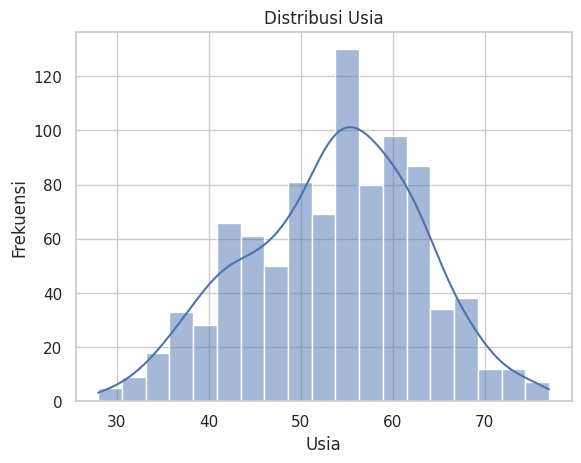

In [24]:
# Visualisasi distribusi usia
sns.histplot(data['Age'], kde=True)
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

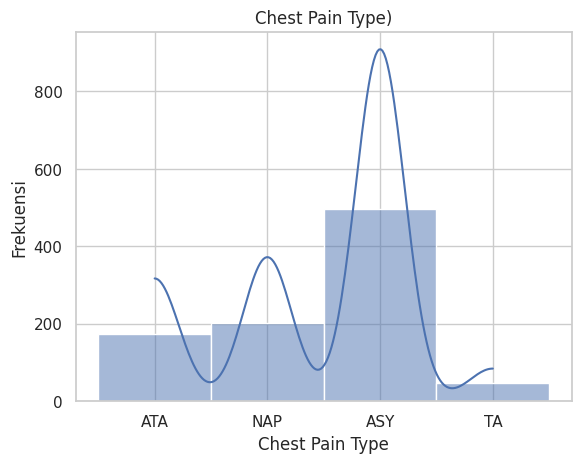

In [25]:
# Visualisasi distribusi BMI
sns.histplot(data['ChestPainType'], kde=True)
plt.title("Chest Pain Type)")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frekuensi")
plt.show()

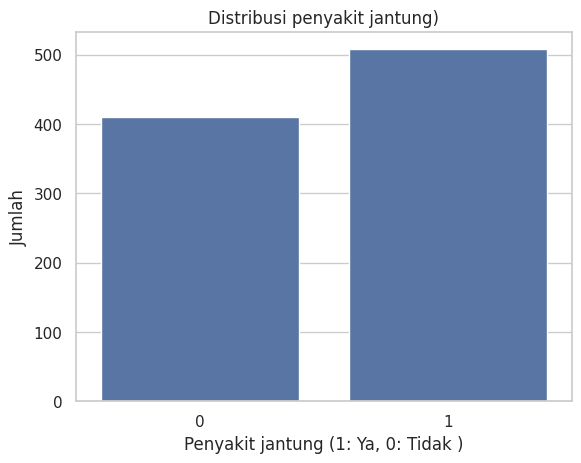

In [27]:
# Visualisasi distribusi penyakit jantung
sns.countplot(x='HeartDisease', data=data)
plt.title("Distribusi penyakit jantung)")
plt.xlabel("Penyakit jantung (1: Ya, 0: Tidak )")
plt.ylabel("Jumlah")
plt.show()

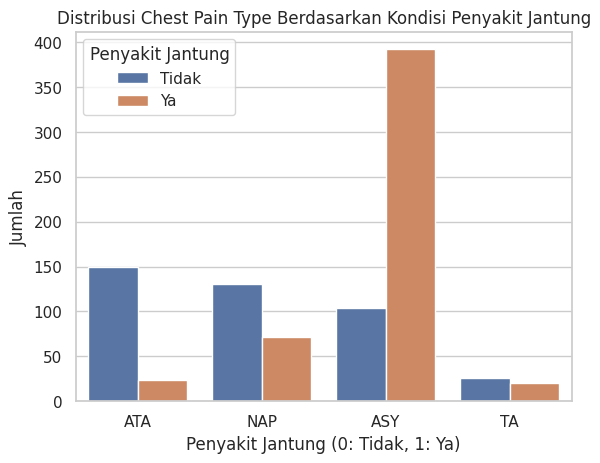

In [28]:
# Visualisasi hubungan chest pain dan penyakit jantung
sns.countplot(x='ChestPainType', hue='HeartDisease', data=data)
plt.title("Distribusi Chest Pain Type Berdasarkan Kondisi Penyakit Jantung")
plt.xlabel("Penyakit Jantung (0: Tidak, 1: Ya)")
plt.ylabel("Jumlah")
plt.legend(title="Penyakit Jantung", labels=["Tidak", "Ya"])
plt.show()

### Analisis Data Berdasarkan Grafik

Distribusi usia pasien menunjukkan bahwa sebagian besar pasien berada dalam rentang usia 46 hingga 60 tahun, dengan puncak frekuensi pada usia 50-an. Hal ini mengindikasikan bahwa penyakit jantung cenderung lebih sering terjadi pada kelompok usia paruh baya hingga lanjut usia. Distribusi ini mengikuti pola normal, dengan sedikit pasien di usia muda maupun usia lanjut ekstrem.

Distribusi tipe nyeri dada (Chest Pain Type) menunjukkan dominasi kategori **ASY (Asymptomatic)**, yang berarti banyak pasien tidak menunjukkan gejala nyeri dada meskipun berisiko tinggi terkena penyakit jantung. Sementara itu, kategori nyeri dada lain seperti **NAP (Non-Anginal Pain)** dan **ATA (Atypical Angina)** memiliki distribusi yang lebih rendah, dan kategori **TA (Typical Angina)** adalah yang paling jarang terjadi.

Distribusi penyakit jantung menunjukkan bahwa jumlah pasien dengan penyakit jantung (**1**) sedikit lebih tinggi dibandingkan jumlah pasien tanpa penyakit (**0**). Dengan demikian, dataset ini memiliki distribusi target yang relatif seimbang, menjadikannya cocok untuk digunakan dalam model klasifikasi tanpa memerlukan penanganan ketidakseimbangan data.

Distribusi tipe nyeri dada berdasarkan kondisi penyakit jantung memberikan wawasan tambahan. Pasien dalam kategori **ASY (Asymptomatic)** memiliki proporsi yang jauh lebih tinggi terkena penyakit jantung dibandingkan kategori lainnya. Pada kategori **NAP (Non-Anginal Pain)** dan **ATA (Atypical Angina)**, distribusi pasien dengan dan tanpa penyakit lebih seimbang, sementara kategori **TA (Typical Angina)** menunjukkan jumlah pasien yang lebih sedikit secara keseluruhan.

Matriks korelasi mengungkapkan hubungan linear antara variabel-variabel dalam dataset. Terdapat hubungan positif antara **Chest Pain Type (cp)** dan **Heart Disease (target)** sebesar 0.25, menunjukkan bahwa jenis nyeri dada tertentu berkaitan dengan peningkatan risiko penyakit jantung. Hubungan positif lainnya terlihat antara **Age** dan **Oldpeak** (0.23), di mana usia yang lebih tua cenderung terkait dengan nilai depresi ST yang lebih tinggi. Sebaliknya, terdapat hubungan negatif antara **Oldpeak** dan **Heart Disease (target)** sebesar -0.21, yang mengindikasikan bahwa nilai oldpeak yang lebih tinggi justru berkaitan dengan penurunan risiko penyakit jantung. Korelasi negatif lainnya terjadi antara **Sex** dan **Heart Disease (target)** sebesar -0.14, menunjukkan bahwa laki-laki memiliki sedikit risiko lebih tinggi dibandingkan perempuan, meskipun hubungan ini lemah.

Secara keseluruhan, sebagian besar korelasi dalam dataset memiliki nilai yang rendah (mendekati 0), menunjukkan hubungan linear yang lemah antar variabel. Oleh karena itu, model machine learning yang lebih kompleks mungkin diperlukan untuk menangkap pola hubungan yang tidak linear dalam data ini.


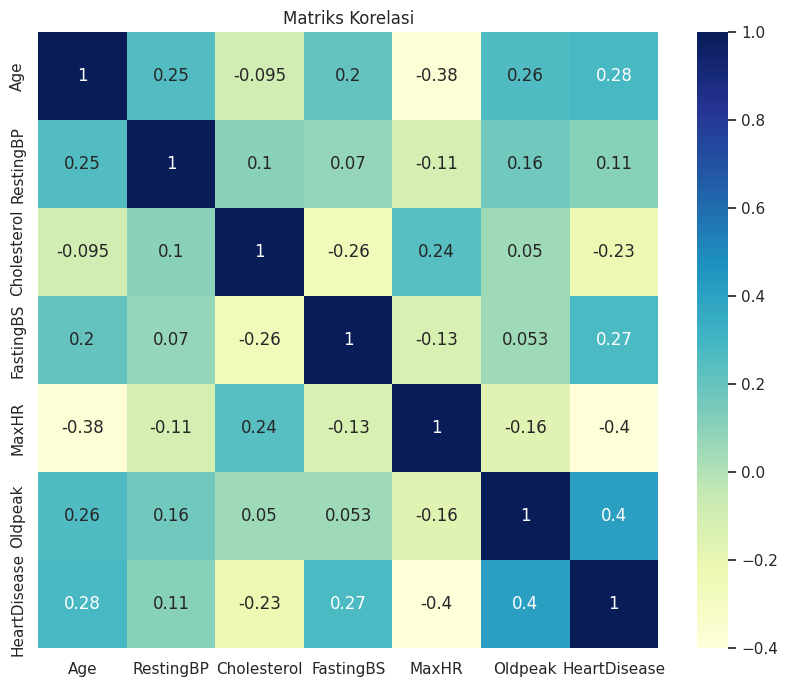

In [29]:
# Mengambil hanya kolom numerik untuk perhitungan korelasi
numeric_data = data.select_dtypes(include=[float, int])

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Matriks Korelasi")
plt.show()

### Analisis Matriks Korelasi

Matriks korelasi ini menunjukkan hubungan linear antara berbagai variabel dalam dataset. Korelasi dinyatakan dalam rentang nilai dari -1 hingga 1, di mana:
- **1** menunjukkan hubungan positif yang sempurna.
- **-1** menunjukkan hubungan negatif yang sempurna.
- **0** menunjukkan tidak ada hubungan linear antara variabel.

Berikut adalah beberapa poin penting dari matriks korelasi ini:

1. **Hubungan Positif:**
   - Terdapat korelasi positif antara **Oldpeak** dan **HeartDisease** dengan nilai **0.4**, menunjukkan bahwa depresi ST (Oldpeak) cenderung meningkat seiring dengan meningkatnya risiko penyakit jantung.
   - **FastingBS** juga memiliki korelasi positif dengan **HeartDisease** sebesar **0.27**, yang menunjukkan bahwa kadar gula darah puasa yang lebih tinggi cenderung meningkatkan risiko penyakit jantung.
   - **Age** dan **HeartDisease** memiliki korelasi positif sebesar **0.28**, mengindikasikan bahwa risiko penyakit jantung meningkat dengan bertambahnya usia.

2. **Hubungan Negatif:**
   - Korelasi negatif terlihat antara **MaxHR** (detak jantung maksimum) dan **HeartDisease** sebesar **-0.4**, yang menunjukkan bahwa pasien dengan detak jantung maksimum yang lebih tinggi cenderung memiliki risiko penyakit jantung yang lebih rendah.
   - Hubungan negatif lainnya adalah antara **Cholesterol** dan **HeartDisease** dengan nilai **-0.23**, menunjukkan bahwa kolesterol yang lebih tinggi cenderung berhubungan dengan risiko penyakit jantung yang lebih rendah, meskipun hubungan ini lemah.

3. **Hubungan Antar Variabel Lain:**
   - **Age** memiliki hubungan positif dengan **Oldpeak** (**0.26**), yang menunjukkan bahwa pasien yang lebih tua cenderung memiliki nilai depresi ST yang lebih tinggi.
   - Korelasi antara **RestingBP** dan variabel lainnya umumnya rendah, dengan nilai tertinggi hanya sebesar **0.16** terhadap **Oldpeak**.
   - **FastingBS** menunjukkan korelasi yang cukup tinggi dengan **Cholesterol** (**0.24**) dan **HeartDisease** (**0.27**).

4. **Kesimpulan:**
   Sebagian besar nilai korelasi dalam matriks ini berada di sekitar nol, yang mengindikasikan hubungan linear yang lemah di antara variabel-variabel tersebut. Namun, beberapa korelasi yang signifikan, seperti antara **Oldpeak**, **MaxHR**, dan **HeartDisease**, memberikan wawasan penting tentang faktor-faktor yang berkaitan dengan risiko penyakit jantung. Hal ini menunjukkan bahwa analisis lebih lanjut dengan pendekatan non-linear mungkin diperlukan untuk memahami hubungan yang lebih kompleks antar variabel.

Matriks ini memberikan gambaran awal tentang keterkaitan variabel dalam dataset dan dapat menjadi dasar untuk analisis lanjutan, seperti membangun model prediksi.


In [30]:
# 1. Ganti '?' dengan NaN
data.replace('?', np.nan, inplace=True)

# 2. Hapus baris yang mengandung NaN
data_cleaned = data.dropna()

# Menampilkan hasil
print(data_cleaned)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  


Proses ini dimulai dengan mengganti semua karakter ? di dataset menggunakan fungsi replace agar menjadi NaN, sehingga nilai yang hilang dapat diidentifikasi dengan standar Python. Langkah berikutnya adalah menghapus semua baris yang mengandung nilai NaN menggunakan fungsi dropna, sehingga dataset menjadi bersih dan bebas dari nilai yang hilang. Hasil pembersihan data disimpan dalam variabel baru bernama data_cleaned. Dataset yang telah dibersihkan kemudian ditampilkan menggunakan perintah print untuk memastikan bahwa data sudah siap digunakan dalam analisis atau pemrosesan lebih lanjut tanpa adanya nilai yang hilang.

# **Data Preparation**

Pada tahap ini, akan melakukan persiapan data dengan beberapa langkah, termasuk menangani nilai-nilai yang hilang, mengonversi variabel kategori menjadi numerik, dan normalisasi. Tujuan dari tahap ini adalah untuk memastikan data dalam kondisi siap untuk proses pemodelan machine learning.

Proses ini memisahkan dataset menjadi fitur (X) dan target (y). Fitur (X) diperoleh dengan menghapus kolom target dari dataset data_cleaned menggunakan fungsi drop, sehingga hanya berisi variabel independen yang akan digunakan sebagai input model. Sementara itu, kolom target disimpan dalam variabel (y) sebagai label atau variabel dependen yang akan diprediksi oleh model. Langkah ini penting untuk mempersiapkan data sebelum pelatihan model machine learning.

In [31]:
# Memisahkan fitur (X) dan target (y)
X = data_cleaned.drop('HeartDisease', axis=1)  # Menghapus kolom 'HeartDisease' dari data_cleaned untuk mendapatkan fitur (X) yang akan digunakan sebagai input model
y = data_cleaned['HeartDisease']  # Menyimpan kolom 'HeartDisease' sebagai variabel target (y), yaitu label yang akan diprediksi



In [32]:
# Menginstal library scikit-learn untuk keperluan machine learning
# Library ini menyediakan algoritma pembelajaran mesin, preprocessing, dan evaluasi model
!pip install scikit-learn

In [34]:
# Mengimpor library untuk proses preprocessing data
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Asumsi: 'X' adalah DataFrame yang berisi fitur numerik dan kategorikal
# Memisahkan fitur kategorikal dan numerik
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']  # Ganti dengan nama kolom kategorikal sebenarnya
numerical_features = X.drop(columns=categorical_features).columns  # Kolom selain kategorikal dianggap numerik

# Melakukan one-hot encoding pada fitur kategorikal
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse_output=False untuk keluaran berbentuk array
encoded_data = encoder.fit_transform(X[categorical_features])  # Transformasi fitur kategorikal
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))  # Mengubah hasil encoding menjadi DataFrame

# Menggabungkan fitur yang telah di-encode dengan fitur numerik
X_encoded = pd.concat([X[numerical_features], encoded_df], axis=1)

# Melakukan normalisasi pada data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)  # Transformasi data agar berada pada rentang 0-1

# Mengonversi kembali data yang telah diskalakan ke dalam bentuk DataFrame (opsional)
X = pd.DataFrame(X_scaled, columns=X_encoded.columns)

In [35]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Menampilkan lima baris pertama dari data yang telah dibersihkan (data_cleaned)
data_cleaned.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [37]:
# Mengonversi data hasil scaling ke dalam DataFrame dengan nama kolom asli
# Menampilkan lima baris pertama untuk memverifikasi hasil scaling
pd.DataFrame(X_scaled, columns=X.columns).head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [38]:
# Memeriksa bentuk data latih dan data uji
print("Data latih (X_train):", X_train.shape)
print("Data uji (X_test):", X_test.shape)
print("Target latih (y_train):", y_train.shape)
print("Target uji (y_test):", y_test.shape)

Data latih (X_train): (734, 20)
Data uji (X_test): (184, 20)
Target latih (y_train): (734,)
Target uji (y_test): (184,)


In [39]:
# Melihat distribusi target pada data latih dan data uji
print("Distribusi target pada data latih:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi target pada data uji:")
print(y_test.value_counts(normalize=True))

Distribusi target pada data latih:
HeartDisease
1    0.546322
0    0.453678
Name: proportion, dtype: float64

Distribusi target pada data uji:
HeartDisease
1    0.581522
0    0.418478
Name: proportion, dtype: float64


### **Logistic Regression**

**Logistic Regression** adalah model machine learning yang sederhana namun sangat efektif untuk tugas klasifikasi biner. Model ini bekerja dengan baik untuk data yang memiliki hubungan linear antara fitur dan logit (logaritma odds). Logistic Regression memprediksi probabilitas suatu kejadian dengan menggunakan fungsi sigmoid, yang memetakan output ke rentang nilai antara 0 dan 1.

#### **Parameter Penting**:
1. **penalty**:  
   Menentukan jenis regularisasi yang digunakan untuk mencegah overfitting. Contohnya:
   - `l1`: Regularisasi Lasso.
   - `l2`: Regularisasi Ridge.
2. **C**:  
   Parameter yang mengontrol kekuatan regularisasi (invers dari regularisasi).  
   - Nilai kecil **C** menunjukkan regularisasi yang lebih kuat.
3. **solver**:  
   Algoritma optimasi untuk menemukan parameter terbaik. Contoh:
   - `lbfgs`: Digunakan untuk dataset yang besar.
   - `liblinear`: Cocok untuk dataset kecil atau dengan regularisasi `l1`.

#### **Kelebihan**:
- Cepat dan efisien untuk dataset berukuran kecil hingga menengah.
- Mudah diimplementasikan dan diinterpretasikan, dengan output berupa probabilitas yang intuitif.
- Cocok untuk data dengan hubungan linear.

#### **Kekurangan**:
- Tidak optimal untuk data yang kompleks atau memiliki hubungan non-linear.
- Sensitif terhadap fitur yang berkorelasi tinggi (multikolinearitas).

Logistic Regression sering digunakan sebagai baseline model sebelum mencoba algoritma yang lebih kompleks.


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi dan pelatihan model Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Prediksi dengan Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)

# Evaluasi
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
print(f"Logistic Regression - Akurasi: {accuracy_logreg:.2f}, F1 Score: {f1_logreg:.2f}")

Logistic Regression - Akurasi: 0.86, F1 Score: 0.88


### **Random Forest**

**Random Forest** adalah algoritma machine learning berbasis ensemble yang menggabungkan hasil dari banyak pohon keputusan (**decision tree**) untuk membuat prediksi yang lebih akurat dan stabil. Model ini sangat efektif untuk menangani data yang kompleks, berisik, atau memiliki banyak fitur, sekaligus mengurangi risiko overfitting dengan cara mengambil rata-rata (untuk regresi) atau voting mayoritas (untuk klasifikasi) dari semua pohon.

#### **Parameter Penting**:
1. **n_estimators**:  
   Menentukan jumlah pohon yang akan dibuat dalam hutan. Semakin banyak pohon, semakin stabil hasil prediksi, tetapi akan membutuhkan lebih banyak waktu komputasi.
2. **max_depth**:  
   Kedalaman maksimum dari setiap pohon. Membatasi kedalaman pohon dapat membantu menghindari overfitting.
3. **min_samples_split**:  
   Minimum jumlah sampel yang diperlukan untuk memisahkan sebuah node. Nilai yang lebih besar dapat mengurangi kompleksitas pohon dan menghindari overfitting.

#### **Kelebihan**:
- Mampu menangani data yang kompleks dengan fitur yang beragam.
- Lebih tahan terhadap overfitting dibandingkan model berbasis pohon tunggal.
- Handal terhadap data yang memiliki outlier atau noise.
- Mampu menangani data dengan kombinasi variabel numerik dan kategorikal.

#### **Kekurangan**:
- Membutuhkan lebih banyak sumber daya komputasi dibandingkan model sederhana.
- Interpretasi hasil lebih sulit dibandingkan model linear atau pohon keputusan tunggal.
- Sulit untuk digunakan pada dataset dengan jumlah fitur yang sangat besar tanpa optimasi.

**Random Forest** sering digunakan dalam berbagai kasus karena fleksibilitas dan kemampuannya memberikan hasil prediksi yang handal meskipun data yang digunakan tidak ideal.


In [51]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi dan pelatihan model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - Akurasi: {accuracy_rf:.2f}, F1 Score: {f1_rf:.2f}")

Random Forest - Akurasi: 0.89, F1 Score: 0.90


### **Support Vector Machine (SVM)**

**Support Vector Machine (SVM)** adalah algoritma machine learning yang bekerja dengan menemukan **hyperplane** optimal yang memisahkan kelas-kelas dalam data. Hyperplane ini dipilih sedemikian rupa sehingga memaksimalkan margin antara kelas-kelas tersebut. SVM sangat cocok untuk dataset yang memiliki margin yang jelas antara kelas-kelas.

#### **Parameter Penting**:
1. **C**:  
   Parameter regularisasi yang mengontrol trade-off antara membuat hyperplane dengan margin maksimum dan menghindari kesalahan klasifikasi.  
   - Nilai **C** yang besar akan fokus pada mengurangi kesalahan klasifikasi, tetapi dapat menyebabkan overfitting.
   - Nilai **C** yang kecil akan menghasilkan margin yang lebih lebar tetapi dapat menyebabkan beberapa kesalahan klasifikasi.
2. **kernel**:  
   Jenis fungsi kernel yang digunakan untuk memetakan data ke dimensi yang lebih tinggi. Contoh:
   - **linear**: Cocok untuk data yang dapat dipisahkan secara linear.
   - **rbf (Radial Basis Function)**: Cocok untuk data yang tidak dapat dipisahkan secara linear.

#### **Kelebihan**:
- Sangat efektif untuk dataset berdimensi tinggi (dengan banyak fitur).
- Dapat bekerja dengan baik bahkan ketika jumlah fitur lebih besar daripada jumlah sampel.
- Fleksibel dengan pilihan kernel, memungkinkan untuk menangani data yang linear maupun non-linear.

#### **Kekurangan**:
- Kurang efisien untuk dataset yang sangat besar karena kompleksitas waktu komputasi yang tinggi.
- Pemilihan parameter seperti **C** dan jenis kernel memerlukan pencarian yang cermat, seperti menggunakan cross-validation.
- Sensitif terhadap skala data, sehingga sering membutuhkan normalisasi atau standarisasi fitur.

SVM adalah algoritma yang sangat andal untuk klasifikasi, terutama pada dataset yang bersih dan dengan margin yang jelas antara kelas-kelas.


In [41]:
from sklearn.svm import SVC

# Inisialisasi dan pelatihan model SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi dengan SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM - Akurasi: {accuracy_svm:.2f}, F1 Score: {f1_svm:.2f}")

SVM - Akurasi: 0.84, F1 Score: 0.86


Hyperparameter Tuning pada SVM

Berikut adalah contoh hyperparameter tuning menggunakan GridSearchCV untuk SVM.

In [42]:
from sklearn.svm import SVC

# Inisialisasi dan pelatihan model SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi dengan SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM - Akurasi: {accuracy_svm:.2f}, F1 Score: {f1_svm:.2f}")

SVM - Akurasi: 0.84, F1 Score: 0.86


### **Model Deep Learning Menggunakan Keras**

Model deep learning ini dirancang menggunakan **Keras**, sebuah library berbasis Python yang populer untuk membangun dan melatih model deep learning. Model ini menggunakan arsitektur sederhana dengan beberapa layer **Dense** (fully connected layers) untuk memprediksi risiko penyakit jantung. Arsitektur ini dapat disesuaikan dengan kebutuhan dataset untuk menangkap pola-pola kompleks dalam data.

#### **Kelebihan**:
- **Kemampuan menangkap pola kompleks**: Model deep learning dapat mempelajari hubungan non-linear dalam data, yang sulit ditangkap oleh model machine learning tradisional.
- **Fleksibilitas**: Mudah disesuaikan untuk berbagai jenis data dan tugas, termasuk klasifikasi dan regresi.
- **Ekspansi arsitektur**: Dapat menambahkan layer tambahan atau mengubah arsitektur untuk meningkatkan kinerja model.

#### **Kekurangan**:
- **Membutuhkan banyak data**: Deep learning biasanya membutuhkan dataset yang besar agar model dapat belajar dengan baik dan menghindari overfitting.
- **Sumber daya komputasi tinggi**: Memerlukan GPU atau perangkat keras yang kuat untuk pelatihan, terutama pada dataset besar.
- **Tuning parameter**: Hyperparameter seperti jumlah layer, ukuran layer, learning rate, dan batch size membutuhkan tuning yang cermat untuk mendapatkan performa optimal.

#### **Implementasi**:
Model ini menggunakan beberapa layer **Dense** dengan fungsi aktivasi seperti **ReLU** untuk layer tersembunyi dan **sigmoid** untuk output. Proses pelatihan dilakukan dengan **optimizer** seperti Adam, dan **loss function** yang disesuaikan dengan jenis masalah (misalnya, binary crossentropy untuk klasifikasi biner).

Model deep learning dengan Keras adalah pendekatan yang sangat fleksibel dan kuat, tetapi memerlukan perencanaan yang matang dalam arsitektur dan pelatihan untuk mendapatkan hasil yang optimal.


In [43]:
# Menginstal library Google Protobuf
# Library ini digunakan untuk memproses Protobuf (Protocol Buffers),
# format serialization yang digunakan secara luas dalam pengembangan model machine learning,
# termasuk TensorFlow.
!pip install google-protobuf

In [44]:
# Mengimpor library TensorFlow untuk membangun dan melatih model Deep Learning
import tensorflow as tf

# Mengimpor kelas dan modul untuk membangun arsitektur model
from tensorflow.keras.models import Sequential  # Untuk membuat model berlapis (sequential model)
from tensorflow.keras.layers import Dense       # Layer fully connected (Dense Layer)

# Mengimpor optimizer Adam untuk proses optimasi model
from tensorflow.keras.optimizers import Adam    # Optimizer populer untuk mempercepat konvergensi dalam pelatihan model

In [45]:
# Membuat model deep learning menggunakan Sequential API
model_dl = Sequential([
    # Layer pertama dengan 64 neuron, fungsi aktivasi ReLU, dan input_shape yang sesuai dengan fitur data latih
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),

    # Layer kedua dengan 32 neuron dan fungsi aktivasi ReLU
    Dense(32, activation='relu'),

    # Layer output dengan 1 neuron dan fungsi aktivasi sigmoid untuk prediksi probabilitas (klasifikasi biner)
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# Mengompilasi model deep learning
model_dl.compile(
    optimizer=Adam(learning_rate=0.001),       # Optimizer Adam dengan learning rate 0.001
    loss='binary_crossentropy',               # Fungsi loss untuk klasifikasi biner
    metrics=['accuracy']                      # Metrik evaluasi yang digunakan adalah akurasi
)

In [47]:
history = model_dl.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4740 - loss: 0.7001 - val_accuracy: 0.7007 - val_loss: 0.6309
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7918 - loss: 0.5749 - val_accuracy: 0.7551 - val_loss: 0.5403
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8358 - loss: 0.4573 - val_accuracy: 0.8299 - val_loss: 0.4638
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8650 - loss: 0.3641 - val_accuracy: 0.8299 - val_loss: 0.4343
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8805 - loss: 0.3239 - val_accuracy: 0.8163 - val_loss: 0.4320
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8741 - loss: 0.3225 - val_accuracy: 0.8435 - val_loss: 0.4255
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8489 - loss: 0.3682 - val_accuracy: 0.8367 - val_loss: 0.4220
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8738 - loss: 0.3156 - val_accuracy: 0.8163 - val_los

In [48]:
# Mengevaluasi model deep learning pada data uji
loss, accuracy_dl = model_dl.evaluate(X_test, y_test)

# Menampilkan hasil akurasi model deep learning
print(f"Deep Learning Model - Akurasi: {accuracy_dl:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.3314 
Deep Learning Model - Akurasi: 0.85


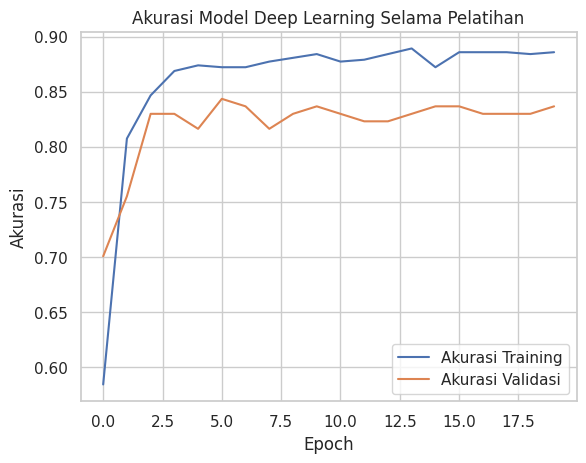

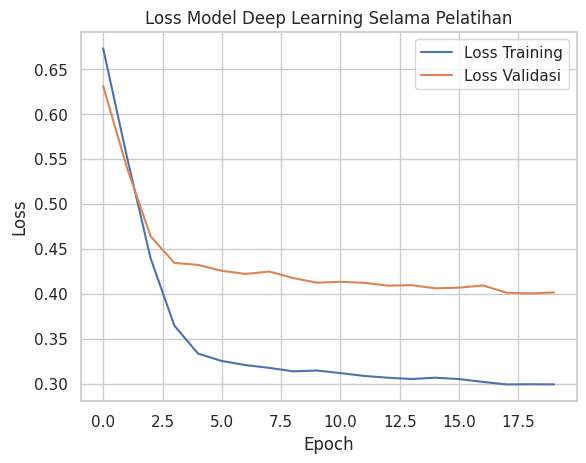

In [49]:
import matplotlib.pyplot as plt

# Grafik Akurasi
plt.plot(history.history['accuracy'], label='Akurasi Training')       # Akurasi selama training
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')   # Akurasi selama validasi
plt.xlabel('Epoch')                                                  # Label sumbu x
plt.ylabel('Akurasi')                                                # Label sumbu y
plt.legend()                                                         # Menambahkan legenda
plt.title('Akurasi Model Deep Learning Selama Pelatihan')            # Judul grafik
plt.show()                                                           # Menampilkan grafik

# Grafik Loss
plt.plot(history.history['loss'], label='Loss Training')             # Loss selama training
plt.plot(history.history['val_loss'], label='Loss Validasi')         # Loss selama validasi
plt.xlabel('Epoch')                                                  # Label sumbu x
plt.ylabel('Loss')                                                   # Label sumbu y
plt.legend()                                                         # Menambahkan legenda
plt.title('Loss Model Deep Learning Selama Pelatihan')               # Judul grafik
plt.show()                                                           # Menampilkan grafik


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary untuk menyimpan hasil evaluasi setiap model
results = {}

# Evaluasi Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)  # Prediksi dengan Logistic Regression
results['Logistic Regression'] = [
    accuracy_score(y_test, y_pred_logreg),     # Menghitung akurasi
    precision_score(y_test, y_pred_logreg),   # Menghitung precision
    recall_score(y_test, y_pred_logreg),      # Menghitung recall
    f1_score(y_test, y_pred_logreg)           # Menghitung F1-score
]

# Evaluasi Random Forest
y_pred_rf = rf_model.predict(X_test)          # Prediksi dengan Random Forest
results['Random Forest'] = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]

# Evaluasi SVM
y_pred_svm = svm_model.predict(X_test)        # Prediksi dengan Support Vector Machine
results['SVM'] = [
    accuracy_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_svm)
]

# Evaluasi Deep Learning
y_pred_dl = (model_dl.predict(X_test) > 0.5).astype("int32")  # Konversi probabilitas ke kelas biner
results['Deep Learning'] = [
    accuracy_score(y_test, y_pred_dl),
    precision_score(y_test, y_pred_dl),
    recall_score(y_test, y_pred_dl),
    f1_score(y_test, y_pred_dl)
]

# Menampilkan hasil evaluasi setiap model
for model_name, scores in results.items():
    print(f"{model_name}:")
    print(f"  Akurasi    : {scores[0]:.2f}")
    print(f"  Precision  : {scores[1]:.2f}")
    print(f"  Recall     : {scores[2]:.2f}")
    print(f"  F1 Score   : {scores[3]:.2f}\n")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [53]:
import pandas as pd

# Konversi hasil ke dalam DataFrame untuk tabel
results_df = pd.DataFrame(results, index=['Akurasi', 'Precision', 'Recall', 'F1 Score']).T
results_df

,Akurasi,Precision,Recall,F1 Score
Logistic Regression,0.864130,0.901961,0.859813,0.880383
Random Forest,0.885870,0.913462,0.887850,0.900474
SVM,0.842391,0.890000,0.831776,0.859903
Deep Learning,0.853261,0.908163,0.831776,0.868293


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


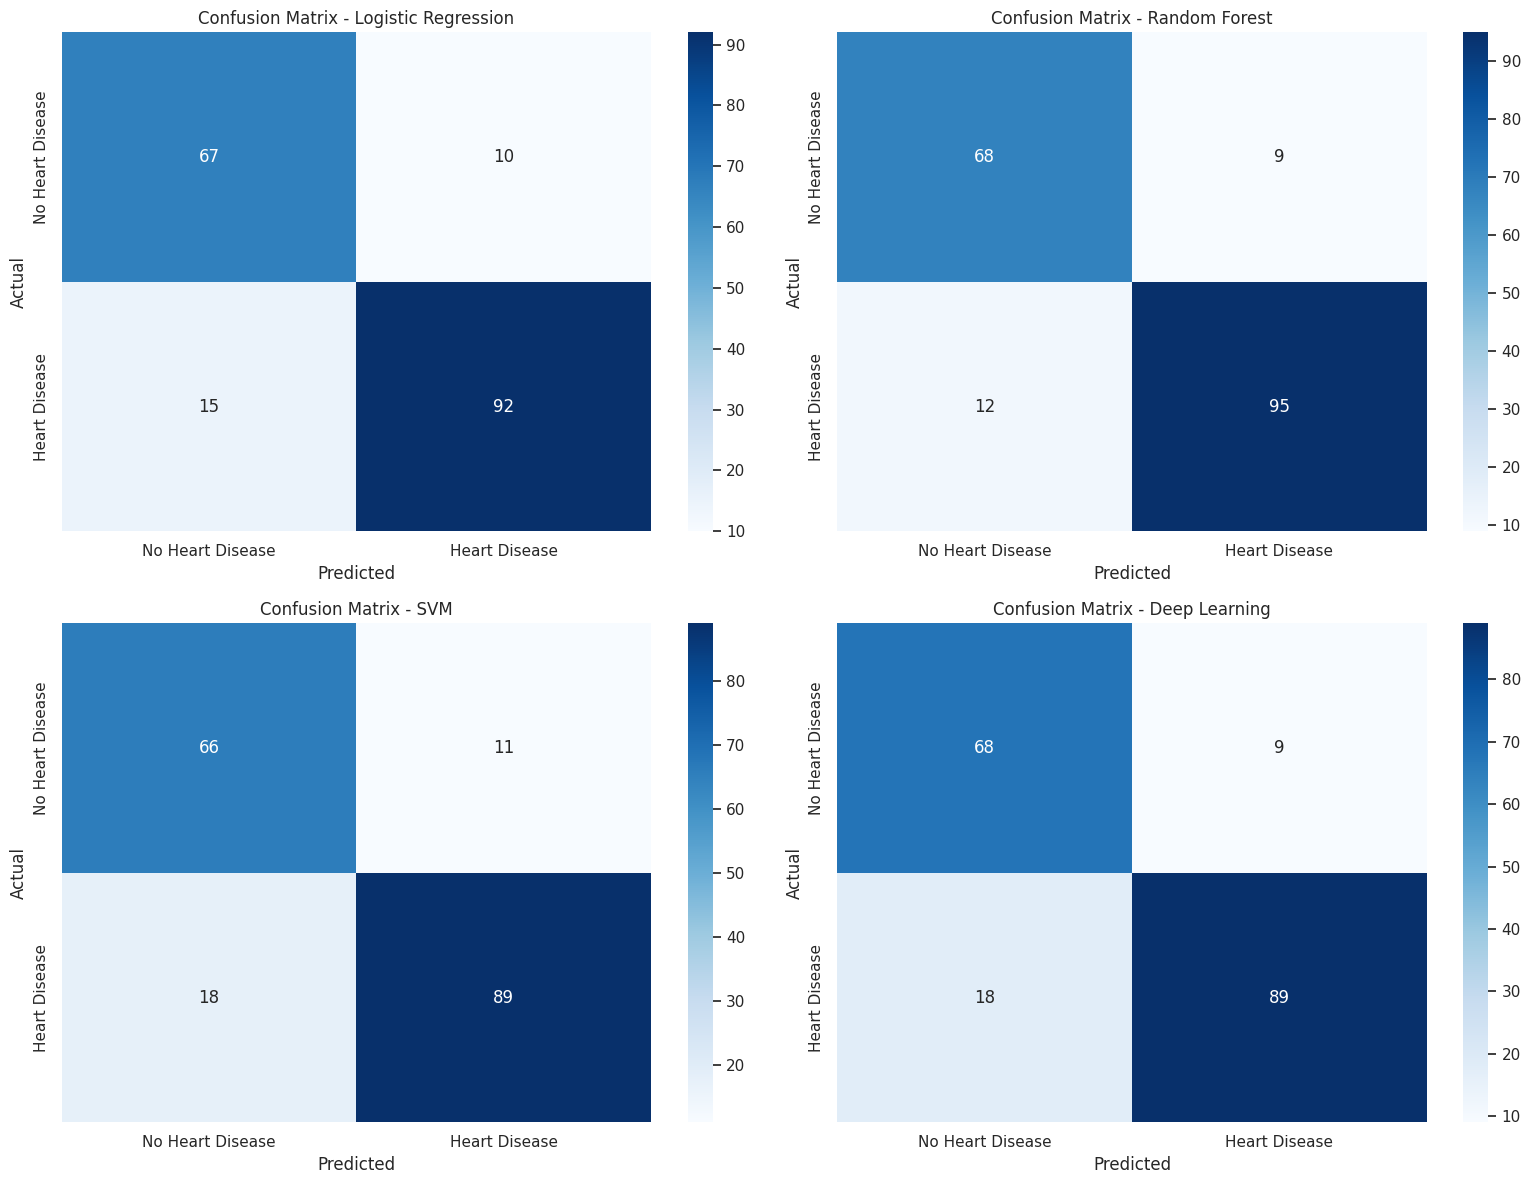

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi untuk setiap model
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_dl = (model_dl.predict(X_test) > 0.5).astype("int32")  # Konversi probabilitas ke kelas biner

# Membuat Confusion Matrix untuk setiap model
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dl = confusion_matrix(y_test, y_pred_dl)

# Membuat subplots untuk menampilkan keempat Confusion Matrix
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Confusion Matrix untuk Logistic Regression
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'], ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Confusion Matrix untuk Random Forest
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'], ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix - Random Forest')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Confusion Matrix untuk SVM
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'], ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix - SVM')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Confusion Matrix untuk Deep Learning
sns.heatmap(cm_dl, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'], ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix - Deep Learning')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

# Menampilkan semua Confusion Matrix
plt.tight_layout()
plt.show()


### **Kesimpulan Evaluasi Model**

Berdasarkan hasil evaluasi model menggunakan metrik **Akurasi**, **Precision**, **Recall**, dan **F1 Score**, berikut adalah analisis dari masing-masing model:

1. **Logistic Regression**:
   - Akurasi: **0.8641**
   - Precision: **0.902**
   - Recall: **0.860**
   - F1 Score: **0.880**
   - Logistic Regression menunjukkan performa yang cukup baik dengan nilai F1 Score sebesar **0.880**, menjadikannya pilihan yang sederhana namun efektif untuk dataset ini.

2. **Random Forest**:
   - Akurasi: **0.8859**
   - Precision: **0.913**
   - Recall: **0.888**
   - F1 Score: **0.900**
   - Random Forest memiliki performa terbaik dibandingkan model lain, dengan nilai **Akurasi (0.8859)** dan **F1 Score (0.900)** tertinggi, menjadikannya model yang paling andal untuk dataset ini.

3. **Support Vector Machine (SVM)**:
   - Akurasi: **0.8424**
   - Precision: **0.890**
   - Recall: **0.832**
   - F1 Score: **0.860**
   - SVM memiliki performa yang sedikit lebih rendah dibandingkan Logistic Regression dan Random Forest, dengan F1 Score sebesar **0.860**.

4. **Deep Learning**:
   - Akurasi: **0.8533**
   - Precision: **0.908**
   - Recall: **0.832**
   - F1 Score: **0.868**
   - Deep Learning menunjukkan performa yang baik, namun tidak sebaik Random Forest, dengan nilai F1 Score sebesar **0.868**.

### **Kesimpulan Akhir**:
- **Random Forest** adalah model dengan performa terbaik, menunjukkan kemampuan yang unggul dalam menangkap pola data kompleks dengan nilai akurasi dan F1 Score tertinggi.
- **Logistic Regression** memberikan hasil yang memadai dan tetap menjadi alternatif yang sederhana serta cepat untuk implementasi.
- Model **Deep Learning** dan **SVM** juga menunjukkan performa yang baik, tetapi membutuhkan sumber daya komputasi lebih tinggi dibanding Logistic Regression.

Dengan mempertimbangkan performa dan kebutuhan sumber daya, Random Forest dapat direkomendasikan sebagai model terbaik untuk prediksi risiko penyakit jantung pada dataset ini.


In [55]:
import joblib

# Menyimpan model Logistic Regression
joblib.dump(logreg_model, 'logistic_regression_model.pkl')

# Menyimpan model Random Forest
joblib.dump(rf_model, 'random_forest_model.pkl')

# Menyimpan model SVM
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']